Assignment I – Statistical Interpretation and Exploratory Data Analysis (EDA)

Course: 5CS037 – Concepts and Technologies of AI

Student Name: Dikshya Thapa

Student ID: 2501600

Dataset: Human_Development_Index_Dataset.csv

Setup and Data Loading

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)

def load_hdi_data(path: str) -> pd.DataFrame:
    """
    Load the HDI dataset from a CSV file.
    """
    return pd.read_csv(path, encoding="latin-1")

def clean_hdi_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Clean the HDI dataset by:
    - Removing unwanted index columns (e.g., Unnamed: 0)
    - Replacing special missing symbols with NaN
    - Converting numeric columns to numeric types
    - Standardizing country names
    - Removing duplicate rows
    """
    df = df.copy()

    # Remove any 'Unnamed' columns created from saved CSV index
    df = df.loc[:, ~df.columns.str.startswith("Unnamed")]

    # Replace common missing-value tokens with NaN
    df = df.replace(["–", "—", "-", "", "NULL", "null", "NaN", "nan"], np.nan)

    # Standardize country names
    if "country" in df.columns:
        df["country"] = df["country"].astype(str).str.strip()

    # Convert year column
    if "year" in df.columns:
        df["year"] = pd.to_numeric(df["year"], errors="coerce").astype("Int64")

    # Convert numeric columns
    numeric_cols = [
        "hdi",
        "life_expectancy",
        "gross_inc_percap",
        "gender_development",
        "gender_inequality",
        "co2_emission_tons",
        "mat_footprint_percap_tons",
        "pop_millions"
    ]

    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")

    # Remove duplicate rows
    df = df.drop_duplicates()

    return df

df_raw = load_hdi_data("Human_Development_Index_Dataset.csv")
df = clean_hdi_data(df_raw)

print("Raw shape:", df_raw.shape)
print("Clean shape:", df.shape)
display(df.head(10))
df.info()


Raw shape: (6798, 30)
Clean shape: (6798, 29)


,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,43.709,2.936460,2.117230,4.532768,0.871962,0.201659,1.493952,3115.670448,NaN,NaN,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,44.353,3.228456,2.246242,4.768261,0.915267,0.218944,1.578809,2817.304736,NaN,NaN,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,45.070,3.520452,2.383115,5.015989,0.958573,0.236229,1.663665,2474.681985,NaN,NaN,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,50.216,3.812448,2.528328,5.276587,1.001878,0.253514,1.748522,1723.019763,NaN,NaN,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,49.531,4.104445,2.682390,5.550723,1.045184,0.270800,1.833378,1202.010488,NaN,NaN,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948
5,AFG,Afghanistan,1995,0.318,52.544,16.418912,NaN,NaN,54.087,51.039,4.396441,2.845840,5.839102,1.088489,0.288085,1.918235,1477.061709,NaN,NaN,NaN,NaN,1.676049,9.093722,NaN,NaN,NaN,NaN,0.086321,2.1968
6,AFG,Afghanistan,1996,0.326,53.243,17.106596,NaN,NaN,54.806,51.722,4.688437,3.019249,6.142464,1.123602,0.305370,1.979188,1468.355839,NaN,NaN,NaN,NaN,1.773336,9.246831,NaN,NaN,NaN,NaN,0.080092,2.0402
7,AFG,Afghanistan,1997,0.330,53.634,17.788819,NaN,NaN,55.151,52.153,4.980433,3.203225,6.461586,1.158715,0.322655,2.040141,1338.724144,NaN,NaN,NaN,NaN,1.870624,9.399939,NaN,NaN,NaN,NaN,0.073316,2.1297
8,AFG,Afghanistan,1998,0.329,52.943,18.493132,NaN,NaN,54.818,51.134,5.272429,3.398412,6.797287,1.193827,0.339940,2.101094,1227.293565,NaN,NaN,NaN,NaN,1.967912,9.553048,NaN,NaN,NaN,NaN,0.069134,2.2010
9,AFG,Afghanistan,1999,0.337,54.846,19.262847,NaN,NaN,56.300,53.410,5.564425,3.605492,7.150429,1.228940,0.357225,2.162048,1122.322570,NaN,NaN,NaN,NaN,2.065200,9.706157,NaN,NaN,NaN,NaN,0.056669,2.0832


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6798 entries, 0 to 6797
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   iso3                       6798 non-null   object 
 1   country                    6798 non-null   object 
 2   year                       6798 non-null   Int64  
 3   hdi                        6171 non-null   float64
 4   life_expectancy            6798 non-null   float64
 5   pop_millions               6798 non-null   float64
 6   hdi_f                      5014 non-null   float64
 7   hdi_m                      5014 non-null   float64
 8   life_expec_f               6798 non-null   float64
 9   life_expec_m               6798 non-null   float64
 10  expec_yr_school            6550 non-null   float64
 11  expec_yr_school_f          6270 non-null   float64
 12  expec_yr_school_m          6270 non-null   float64
 13  mean_yr_school             6254 non-null   float

**Note on `Unnamed` columns:**  
Columns such as `Unnamed: 0` were removed because they represent an automatically saved dataframe index from a previous CSV export and do not contain meaningful data for analysis.

Problem 1A – Single-Year HDI Exploration (2022)

### Task 1: Extract Latest Year (2022)

In this task, the dataset is explored to identify all unique years available. The dataset is then filtered to include only observations from the latest year (2022). The filtered dataset is saved as `hdi_2022_df`, which will be used for all subsequent tasks in Problem 1A.


In [96]:
# Identify all unique years in the dataset
unique_years = sorted(df["year"].dropna().unique())
print("Unique years available in the dataset:")
print(unique_years)

# Identify the latest year
latest_year = max(unique_years)
print("Latest available year:", latest_year)

# Filter dataset for the latest year (2022)
hdi_2022_df = df[df["year"] == latest_year].copy()

# Display shape and first few rows as intermediate output
print("Shape of filtered dataset (2022):", hdi_2022_df.shape)
display(hdi_2022_df.head(10))


Unique years available in the dataset:
[np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]
Latest available year: 2022
Shape of filtered dataset (2022): (206, 29)


,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,10.705385,8.053257,13.228449,2.514790,1.174130,3.912740,1335.205733,395.915459,2256.217507,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,74.502,14.487470,14.681040,14.292200,10.121144,9.811468,10.433855,15293.326510,13198.539560,17398.003690,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,75.853,15.487880,16.264179,14.743880,6.987444,6.490568,7.481537,10978.405710,3841.656612,17858.790780,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,81.430,12.783780,12.765060,12.810630,11.613440,11.522590,11.704380,54233.449480,NaN,NaN,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,59.351,12.167600,11.535400,12.909900,5.844292,4.462809,7.187960,5327.788251,4696.356687,5973.845631,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
197,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,76.507,15.512328,16.746290,14.350537,10.546230,10.344223,10.595975,18783.965360,NaN,NaN,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,72.851,18.979509,20.914900,17.130329,11.144080,11.391660,10.857980,22047.971310,16933.062910,27264.830910,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
263,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,67.866,14.405610,14.812910,14.022340,11.330300,11.321520,11.341190,15388.299760,13442.501330,17770.415300,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
296,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,81.708,21.080021,21.981430,20.193760,12.726820,12.810590,12.639710,49257.135200,41131.470850,57495.771580,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,80.150,16.367460,16.838499,15.922670,12.305714,12.048949,12.578872,56529.663290,41899.211240,71616.204300,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621


Task 2: Data Exploration (2022)

### Task 2: Data Exploration (2022)

This task explores the structure of the 2022 dataset by:
- Displaying the first 10 rows
- Counting the number of rows and columns
- Listing all column names along with their data types


In [97]:
# Display the first 10 rows of the 2022 dataset
display(hdi_2022_df.head(10))

# Count number of rows and columns
rows, cols = hdi_2022_df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

# List column names and their data types
display(pd.DataFrame({
    "Column Name": hdi_2022_df.columns,
    "Data Type": hdi_2022_df.dtypes.astype(str)
}))

,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,10.705385,8.053257,13.228449,2.514790,1.174130,3.912740,1335.205733,395.915459,2256.217507,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,74.502,14.487470,14.681040,14.292200,10.121144,9.811468,10.433855,15293.326510,13198.539560,17398.003690,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,75.853,15.487880,16.264179,14.743880,6.987444,6.490568,7.481537,10978.405710,3841.656612,17858.790780,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,81.430,12.783780,12.765060,12.810630,11.613440,11.522590,11.704380,54233.449480,NaN,NaN,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,59.351,12.167600,11.535400,12.909900,5.844292,4.462809,7.187960,5327.788251,4696.356687,5973.845631,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
197,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,76.507,15.512328,16.746290,14.350537,10.546230,10.344223,10.595975,18783.965360,NaN,NaN,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,72.851,18.979509,20.914900,17.130329,11.144080,11.391660,10.857980,22047.971310,16933.062910,27264.830910,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
263,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,67.866,14.405610,14.812910,14.022340,11.330300,11.321520,11.341190,15388.299760,13442.501330,17770.415300,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
296,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,81.708,21.080021,21.981430,20.193760,12.726820,12.810590,12.639710,49257.135200,41131.470850,57495.771580,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,80.150,16.367460,16.838499,15.922670,12.305714,12.048949,12.578872,56529.663290,41899.211240,71616.204300,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621


Number of rows: 206
Number of columns: 29


,Column Name,Data Type
iso3,iso3,object
country,country,object
year,year,Int64
hdi,hdi,float64
life_expectancy,life_expectancy,float64
pop_millions,pop_millions,float64
hdi_f,hdi_f,float64
hdi_m,hdi_m,float64
life_expec_f,life_expec_f,float64
life_expec_m,life_expec_m,float64


Task 3: Missing Values & Data Cleaning (2022)

### Task 3: Missing Values and Data Cleaning (2022)

This task examines the 2022 dataset for missing values, data quality issues, and inconsistencies.
The dataset is inspected for:
- Missing values in each column
- Numeric columns stored as text
- Inconsistent or misspelled country names
- Duplicate rows
- Special characters representing missing data

Appropriate data cleaning steps are then applied, and the choices are justified.


Check Missing Values

In [98]:
# Check missing values in each column
missing_values = hdi_2022_df.isna().sum()

print("Missing values per column:")
display(missing_values[missing_values > 0])


Missing values per column:


,0
hdi,2
hdi_f,13
hdi_m,13
expec_yr_school,1
expec_yr_school_f,1
expec_yr_school_m,1
mean_yr_school,2
mean_yr_school_f,2
mean_yr_school_m,2
gross_inc_percap,2


Inspect Dataset Quality Issues

In [99]:
# Inspect numeric columns stored as text
print("Data types of columns:")
display(pd.DataFrame({
    "Column": hdi_2022_df.columns,
    "Data Type": hdi_2022_df.dtypes.astype(str)
}))

# Check for duplicate rows
duplicate_count = hdi_2022_df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

# Inspect country name consistency
print("Sample country names:")
display(hdi_2022_df["country"].sort_values().unique()[:20])

Data types of columns:


,Column,Data Type
iso3,iso3,object
country,country,object
year,year,Int64
hdi,hdi,float64
life_expectancy,life_expectancy,float64
pop_millions,pop_millions,float64
hdi_f,hdi_f,float64
hdi_m,hdi_m,float64
life_expec_f,life_expec_f,float64
life_expec_m,life_expec_m,float64


Number of duplicate rows: 0
Sample country names:


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Arab States', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin'],
      dtype=object)

Apply Cleaning Steps

In [100]:
# Remove duplicate rows
before_duplicates = hdi_2022_df.shape
hdi_2022_df = hdi_2022_df.drop_duplicates()
after_duplicates = hdi_2022_df.shape

print("Shape before removing duplicates:", before_duplicates)
print("Shape after removing duplicates :", after_duplicates)

# Handle missing values:
# Drop rows missing essential variables (country, year, hdi)
before_missing = hdi_2022_df.shape
hdi_2022_df = hdi_2022_df.dropna(subset=["country", "year", "hdi"]).copy()
after_missing = hdi_2022_df.shape

print("Shape before handling missing values:", before_missing)
print("Shape after handling missing values :", after_missing)

# Display cleaned dataset preview
display(hdi_2022_df.head(10))


Shape before removing duplicates: (206, 29)
Shape after removing duplicates : (206, 29)
Shape before handling missing values: (206, 29)
Shape after handling missing values : (204, 29)


,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,10.705385,8.053257,13.228449,2.514790,1.174130,3.912740,1335.205733,395.915459,2256.217507,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,74.502,14.487470,14.681040,14.292200,10.121144,9.811468,10.433855,15293.326510,13198.539560,17398.003690,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,75.853,15.487880,16.264179,14.743880,6.987444,6.490568,7.481537,10978.405710,3841.656612,17858.790780,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,81.430,12.783780,12.765060,12.810630,11.613440,11.522590,11.704380,54233.449480,NaN,NaN,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,59.351,12.167600,11.535400,12.909900,5.844292,4.462809,7.187960,5327.788251,4696.356687,5973.845631,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
197,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,76.507,15.512328,16.746290,14.350537,10.546230,10.344223,10.595975,18783.965360,NaN,NaN,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,72.851,18.979509,20.914900,17.130329,11.144080,11.391660,10.857980,22047.971310,16933.062910,27264.830910,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
263,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,67.866,14.405610,14.812910,14.022340,11.330300,11.321520,11.341190,15388.299760,13442.501330,17770.415300,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
296,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,81.708,21.080021,21.981430,20.193760,12.726820,12.810590,12.639710,49257.135200,41131.470850,57495.771580,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,80.150,16.367460,16.838499,15.922670,12.305714,12.048949,12.578872,56529.663290,41899.211240,71616.204300,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621


**Data Cleaning Decisions Justification:**

- Numeric columns were converted to appropriate numeric data types to enable accurate statistical analysis.
- Duplicate rows were removed to prevent double-counting of country observations.
- Special characters such as “–” were treated as missing values and replaced with NaN during the initial cleaning stage.
- Rows missing essential variables (country, year, or HDI) were removed rather than imputed, because HDI is the primary variable of interest and imputing it could introduce bias.


Task 4: Basic Statistics (HDI – 2022)

### Task 4: Basic Statistics (HDI – 2022)

This task computes basic descriptive statistics for the Human Development Index (HDI) in the year 2022.
Specifically, the mean, median, and standard deviation of HDI are calculated. Additionally, the countries
with the highest and lowest HDI values in 2022 are identified.


Compute Statistics & Identify Extremes

In [101]:
# Compute mean, median, and standard deviation of HDI (2022)
mean_hdi = hdi_2022_df["hdi"].mean()
median_hdi = hdi_2022_df["hdi"].median()
std_hdi = hdi_2022_df["hdi"].std()

print(f"Mean HDI (2022): {mean_hdi:.3f}")
print(f"Median HDI (2022): {median_hdi:.3f}")
print(f"Standard Deviation of HDI (2022): {std_hdi:.3f}")

# Identify country with highest HDI
highest_hdi_row = hdi_2022_df.loc[hdi_2022_df["hdi"].idxmax()]
print("\nCountry with the highest HDI in 2022:")
display(highest_hdi_row[["country", "hdi"]])

# Identify country with lowest HDI
lowest_hdi_row = hdi_2022_df.loc[hdi_2022_df["hdi"].idxmin()]
print("\nCountry with the lowest HDI in 2022:")
display(lowest_hdi_row[["country", "hdi"]])


Mean HDI (2022): 0.723
Median HDI (2022): 0.740
Standard Deviation of HDI (2022): 0.153

Country with the highest HDI in 2022:


,5609
country,Switzerland
hdi,0.967



Country with the lowest HDI in 2022:


,5345
country,Somalia
hdi,0.38


**Interpretation:**

- The mean and median HDI values provide an overview of the overall development level across countries in 2022.
- The standard deviation indicates the extent of inequality in HDI values between countries.
- The highest HDI country represents the most developed country according to the HDI metric in 2022,
  while the lowest HDI country highlights the least developed country in the dataset.


Task 5: Filtering and Sorting (2022)




### Task 5: Filtering and Sorting (2022)

This task filters countries with a Human Development Index (HDI) greater than 0.800 and then sorts the
filtered dataset by Gross National Income (GNI) per capita in descending order. The top 10 countries
based on GNI per capita are displayed.


Filter, Sort, Display

In [102]:
# Filter countries with HDI greater than 0.800
high_hdi_df = hdi_2022_df[hdi_2022_df["hdi"] > 0.800].copy()

print("Number of countries with HDI > 0.800:", high_hdi_df.shape[0])

# Sort by GNI per capita in descending order
sorted_high_hdi_df = high_hdi_df.sort_values(
    by="gross_inc_percap",
    ascending=False
)

# Display the top 10 countries
display(
    sorted_high_hdi_df[
        ["country", "hdi", "gross_inc_percap"]
    ].head(10)
)


Number of countries with HDI > 0.800: 71


,country,hdi,gross_inc_percap
3332,Liechtenstein,0.942,146673.24150
4718,Qatar,0.875,95944.37754
5213,Singapore,0.949,88761.14559
2705,Ireland,0.950,87467.51391
3398,Luxembourg,0.927,78554.23640
6104,United Arab Emirates,0.937,74103.71494
5609,Switzerland,0.967,69432.78669
4322,Norway,0.966,69189.76165
6170,United States,0.927,65564.93798
2474,"Hong Kong, China (SAR)",0.956,62485.50516


**Insight:**

Countries with very high HDI levels generally also exhibit high GNI per capita values, indicating a
strong association between income levels and overall human development.


Task 6: Add HDI Category Column + Verify + Save

### Task 6: Adding HDI Category Column (2022)

A new column `HDI_Category` is created to classify each country into one of the four UNDP HDI groups
based on the 2022 HDI value using the official thresholds:

- Low:    HDI < 0.550  
- Medium: 0.550 – 0.699  
- High:   0.700 – 0.799  
- Very:   HDI ≥ 0.800  

After creating the column, the classification is verified and the final dataframe is saved as
`HDI_category_added.csv`.

(classification + verification + save)

In [103]:
# Create HDI_Category using UNDP thresholds
def classify_hdi(hdi_value: float) -> str:
    """
    Classify a country into UNDP HDI categories based on 2022 HDI value.
    """
    if pd.isna(hdi_value):
        return np.nan
    if hdi_value < 0.550:
        return "Low"
    elif 0.550 <= hdi_value <= 0.699:
        return "Medium"
    elif 0.700 <= hdi_value <= 0.799:
        return "High"
    else:  # hdi_value >= 0.800
        return "Very"

hdi_2022_df["HDI_Category"] = hdi_2022_df["hdi"].apply(classify_hdi)

# Verification 1: show category counts
print("HDI_Category counts:")
display(hdi_2022_df["HDI_Category"].value_counts(dropna=False))

# Verification 2: check boundary values are classified correctly
boundary_check = hdi_2022_df[
    (hdi_2022_df["hdi"].between(0.545, 0.555)) |
    (hdi_2022_df["hdi"].between(0.695, 0.705)) |
    (hdi_2022_df["hdi"].between(0.795, 0.805))
].copy()

print("Boundary classification check (values near 0.550, 0.700, 0.800):")
display(boundary_check[["country", "hdi", "HDI_Category"]].sort_values("hdi"))

# Verification 3: confirm new column exists in dataframe
print("New column added?", "HDI_Category" in hdi_2022_df.columns)

# Save final dataframe
hdi_2022_df.to_csv("HDI_category_added.csv", index=False)
print("Saved file: HDI_category_added.csv")

HDI_Category counts:


,count
HDI_Category,
Very,71
High,54
Medium,44
Low,35


Boundary classification check (values near 0.550, 0.700, 0.800):


,country,hdi,HDI_Category
5807,Togo,0.547,Low
4817,Rwanda,0.548,Low
4256,Nigeria,0.548,Low
6764,Sub-Saharan Africa,0.549,Low
6038,Uganda,0.550,Medium
6434,Zimbabwe,0.550,Medium
2408,Haiti,0.552,Medium
4058,Nauru,0.696,Medium
3926,Morocco,0.698,Medium
692,Bolivia (Plurinational State of),0.698,Medium


New column added? True
Saved file: HDI_category_added.csv


**Insight:**  
The HDI categories provide a clearer grouping of countries by development level, making it easier to compare
patterns across regions and income levels in later analysis.

Problem 1B – HDI Visualization and Trend Analysis (2020–2022)

### Task 1: Data Extraction and Saving (2020–2022)

In this task, the dataset is filtered to include only observations from the years 2020, 2021, and 2022.
The filtered dataset is saved as `HDI_problem1B.csv` and will be used for all subsequent tasks in
Problem 1B.


(Filter, Verify, Save)

In [104]:
# Filter dataset for years 2020, 2021, and 2022
hdi_problem1B_df = df[df["year"].isin([2020, 2021, 2022])].copy()

# Intermediate verification output
print("Filtered years present in the dataset:")
print(sorted(hdi_problem1B_df["year"].unique()))

print("Shape of filtered dataset (2020–2022):", hdi_problem1B_df.shape)
display(hdi_problem1B_df.head())

# Save the filtered dataset
hdi_problem1B_df.to_csv("HDI_problem1B.csv", index=False)
print("Saved file: HDI_problem1B.csv")

Filtered years present in the dataset:
[np.int64(2020), np.int64(2021), np.int64(2022)]
Shape of filtered dataset (2020–2022): (618, 29)


,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
30,AFG,Afghanistan,2020,0.488,62.575,38.972231,0.381373,0.548741,65.432,59.866,10.705385,8.053257,13.228449,2.841610,2.050737,3.407107,1986.803772,670.996249,3275.057369,0.695,0.674,6.092345,15.945160,27.215190,72.784810,16.50,66.84,0.305040,1.5554
31,AFG,Afghanistan,2021,0.473,61.982,40.099462,0.379129,0.528559,65.279,58.915,10.705385,8.053257,13.228449,2.985070,2.311080,3.401310,1534.135377,618.868288,2430.862265,0.717,0.653,6.395730,14.865710,27.215190,72.784810,23.33,77.09,0.306318,1.2351
32,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,10.705385,8.053257,13.228449,2.514790,1.174130,3.912740,1335.205733,395.915459,2256.217507,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
63,ALB,Albania,2020,0.784,76.989,2.866849,0.775404,0.793220,79.676,74.632,14.759720,15.019560,14.492910,10.121144,9.811468,10.433855,13069.127700,11153.644450,14983.695140,0.978,0.129,82.249185,86.476634,29.508197,70.491803,54.45,68.91,1.750668,10.4704
64,ALB,Albania,2021,0.785,76.463,2.854710,0.777866,0.792942,79.173,74.087,14.571750,14.849250,14.289420,10.121144,9.811468,10.433855,14399.780470,12550.782890,16252.408730,0.981,0.117,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.5865


Saved file: HDI_problem1B.csv


### Task 2: Data Cleaning (2020–2022)

This task focuses on cleaning the filtered dataset (2020–2022) to ensure reliable trend analysis.
Essential columns (`hdi`, `country`, and `year`) are checked for missing values. The dataset is inspected
for data quality issues such as missing values, duplicate rows, inconsistent country names, and numeric
columns stored as text or containing non-numeric symbols. Appropriate cleaning steps are applied and
justified.

Check Missing Values in Essential Columns

In [105]:
# Essential columns
essential_columns = ["hdi", "country", "year"]

# Check missing values in essential columns
print("Missing values in essential columns:")
display(hdi_problem1B_df[essential_columns].isna().sum())

# Show sample rows with missing essential values
rows_with_missing = hdi_problem1B_df[
    hdi_problem1B_df[essential_columns].isna().any(axis=1)
]
print("\nRows with missing essential values (sample):")
display(rows_with_missing.head())



Missing values in essential columns:


,0
hdi,8
country,0
year,0



Rows with missing essential values (sample):


,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
3000,PRK,Korea (Democratic People's Rep. of),2020,NaN,73.274,25.867467,NaN,NaN,75.725,70.793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.612809,82.387191,NaN,NaN,1.925751,NaN
3001,PRK,Korea (Democratic People's Rep. of),2021,NaN,73.284,25.971909,NaN,NaN,75.743,70.831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.612809,82.387191,NaN,NaN,1.976609,NaN
3002,PRK,Korea (Democratic People's Rep. of),2022,NaN,73.578,26.069416,NaN,NaN,76.146,70.973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.612809,82.387191,NaN,NaN,1.976609,NaN
3825,MCO,Monaco,2020,NaN,86.538,0.036922,NaN,NaN,88.436,84.783,18.691519,19.388407,18.053978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.333333,66.666667,39.97,57.16,NaN,NaN
3826,MCO,Monaco,2021,NaN,85.946,0.036686,NaN,NaN,87.677,84.343,18.691519,19.388407,18.053978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.333333,66.666667,39.51,56.61,NaN,NaN


Inspect Data Quality Issues

In [106]:
# a) Inconsistent / misspelled country names (basic check)
print("\nSample of country names (before cleaning):")
display(
    hdi_problem1B_df["country"]
    .dropna()
    .astype(str)
    .sort_values()
    .unique()[:20]
)

# b) Duplicate rows
duplicate_count = hdi_problem1B_df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_count)

# c) Numeric columns stored as text
print("\nColumn data types (before conversion):")
display(pd.DataFrame({
    "Column": hdi_problem1B_df.columns,
    "Data Type": hdi_problem1B_df.dtypes.astype(str)
}))



Sample of country names (before cleaning):


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Arab States', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin'],
      dtype=object)


Number of duplicate rows: 0

Column data types (before conversion):


,Column,Data Type
iso3,iso3,object
country,country,object
year,year,Int64
hdi,hdi,float64
life_expectancy,life_expectancy,float64
pop_millions,pop_millions,float64
hdi_f,hdi_f,float64
hdi_m,hdi_m,float64
life_expec_f,life_expec_f,float64
life_expec_m,life_expec_m,float64


Apply Cleaning Steps

In [107]:
# a) Ensure year is numeric
hdi_problem1B_df["year"] = pd.to_numeric(
    hdi_problem1B_df["year"], errors="coerce"
)

# b) Standardize country names
hdi_problem1B_df["country"] = (
    hdi_problem1B_df["country"]
    .astype("string")
    .str.strip()
)

# c) Convert numeric columns stored as text
hdi_problem1B_df["hdi"] = pd.to_numeric(
    hdi_problem1B_df["hdi"], errors="coerce"
)

if "gross_inc_percap" in hdi_problem1B_df.columns:
    hdi_problem1B_df["gross_inc_percap"] = pd.to_numeric(
        hdi_problem1B_df["gross_inc_percap"], errors="coerce"
    )

# d) Remove duplicate rows
before_duplicates = hdi_problem1B_df.shape
hdi_problem1B_df = hdi_problem1B_df.drop_duplicates()
after_duplicates = hdi_problem1B_df.shape

print("\nShape before removing duplicates:", before_duplicates)
print("Shape after removing duplicates :", after_duplicates)

# e) Handle missing values (drop rows with missing essential data)
before_missing = hdi_problem1B_df.shape
hdi_problem1B_df = hdi_problem1B_df.dropna(
    subset=essential_columns
).copy()
after_missing = hdi_problem1B_df.shape

print("\nShape before handling missing values:", before_missing)
print("Shape after handling missing values :", after_missing)

# 4) Final verification
print("\nMissing values after cleaning:")
display(hdi_problem1B_df[essential_columns].isna().sum())

print("\nSample of country names (after cleaning):")
display(
    hdi_problem1B_df["country"]
    .sort_values()
    .unique()[:20]
)

print("\nFinal cleaned dataset preview:")
display(hdi_problem1B_df.head())



Shape before removing duplicates: (618, 29)
Shape after removing duplicates : (618, 29)

Shape before handling missing values: (618, 29)
Shape after handling missing values : (610, 29)

Missing values after cleaning:


,0
hdi,0
country,0
year,0



Sample of country names (after cleaning):


<StringArray>
[        'Afghanistan',             'Albania',             'Algeria',             'Andorra',              'Angola',
 'Antigua and Barbuda',         'Arab States',           'Argentina',             'Armenia',           'Australia',
             'Austria',          'Azerbaijan',             'Bahamas',             'Bahrain',          'Bangladesh',
            'Barbados',             'Belarus',             'Belgium',              'Belize',               'Benin']
Length: 20, dtype: string


Final cleaned dataset preview:


,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
30,AFG,Afghanistan,2020,0.488,62.575,38.972231,0.381373,0.548741,65.432,59.866,10.705385,8.053257,13.228449,2.841610,2.050737,3.407107,1986.803772,670.996249,3275.057369,0.695,0.674,6.092345,15.945160,27.215190,72.784810,16.50,66.84,0.305040,1.5554
31,AFG,Afghanistan,2021,0.473,61.982,40.099462,0.379129,0.528559,65.279,58.915,10.705385,8.053257,13.228449,2.985070,2.311080,3.401310,1534.135377,618.868288,2430.862265,0.717,0.653,6.395730,14.865710,27.215190,72.784810,23.33,77.09,0.306318,1.2351
32,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,10.705385,8.053257,13.228449,2.514790,1.174130,3.912740,1335.205733,395.915459,2256.217507,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
63,ALB,Albania,2020,0.784,76.989,2.866849,0.775404,0.793220,79.676,74.632,14.759720,15.019560,14.492910,10.121144,9.811468,10.433855,13069.127700,11153.644450,14983.695140,0.978,0.129,82.249185,86.476634,29.508197,70.491803,54.45,68.91,1.750668,10.4704
64,ALB,Albania,2021,0.785,76.463,2.854710,0.777866,0.792942,79.173,74.087,14.571750,14.849250,14.289420,10.121144,9.811468,10.433855,14399.780470,12550.782890,16252.408730,0.981,0.117,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.5865


Problem 1B – Task 3A: Line Chart — HDI Trend (Country-Level)

### Task 3A: Line Chart — HDI Trend (Country-Level)

This task visualizes HDI trends for selected countries over the years 2020, 2021, and 2022.
Five countries are chosen to observe and compare changes in HDI values across time.

Filter dataset for years 2020–2022

Line Chart (HDI Trend)

,country,year,hdi
459,Bangladesh,2020,0.657
460,Bangladesh,2021,0.662
461,Bangladesh,2022,0.670
2571,India,2020,0.638
2572,India,2021,0.633
2573,India,2022,0.644
4089,Nepal,2020,0.593
4090,Nepal,2021,0.591
4091,Nepal,2022,0.601
4386,Pakistan,2020,0.536


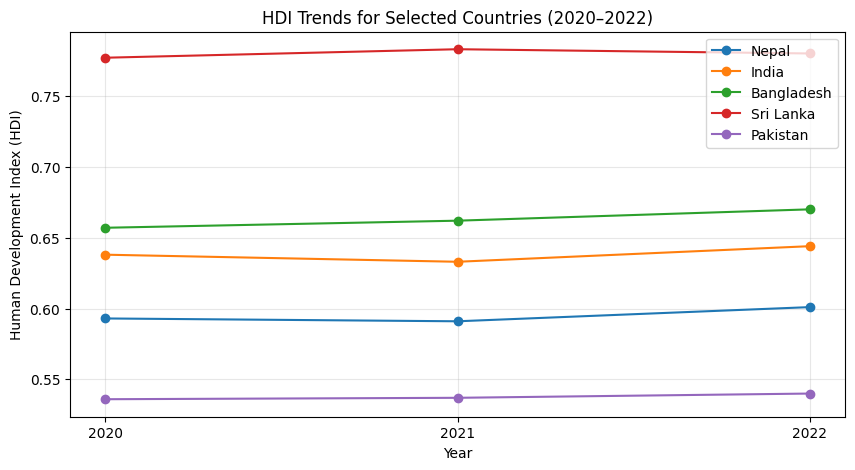

In [108]:
# Select five countries (you may change these if desired)
selected_countries = ["Nepal", "India", "Bangladesh", "Sri Lanka", "Pakistan"]

# Filter dataset for selected countries
trend_df = hdi_problem1B_df[
    hdi_problem1B_df["country"].isin(selected_countries)
].sort_values(["country", "year"])

# Display intermediate data used for plotting
display(trend_df[["country", "year", "hdi"]])

# Create line chart
plt.figure(figsize=(10, 5))

for country in selected_countries:
    country_data = trend_df[trend_df["country"] == country]
    plt.plot(
        country_data["year"],
        country_data["hdi"],
        marker="o",
        label=country
    )

# Chart formatting
plt.xlabel("Year")
plt.ylabel("Human Development Index (HDI)")
plt.title("HDI Trends for Selected Countries (2020–2022)")
plt.xticks([2020, 2021, 2022])
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

**Figure X: HDI Trends for Selected Countries (2020–2022)**  

The line chart illustrates changes in HDI values for the selected countries over the period
2020 to 2022. Overall, the trends show relatively gradual changes in HDI, with minor declines
or stagnation around 2020–2021 followed by modest improvements in 2022, reflecting the broader
impact and recovery patterns associated with global socio-economic conditions.


Problem 1B – Task 3B: Additional Visualizations

### Task 3B (A): Bar Chart — Average HDI by Region (2020–2022)

This visualization compares the average HDI across regions for each year from 2020 to 2022.

In [112]:
# 1) Combine the two region datasets
combined_df = pd.concat(
    [hdi_southasia_2020_2022, hdi_middleeast_2020_2022],
    ignore_index=True
)

# Safety: keep only needed years and required columns
combined_df = combined_df[combined_df["year"].isin([2020, 2021, 2022])].copy()
combined_df = combined_df.dropna(subset=["region", "year", "hdi"])

# 2) Group & compute mean HDI for each region-year pair
region_year_avg = (
    combined_df
    .groupby(["year", "region"], as_index=False)["hdi"]
    .mean()
)

display(region_year_avg)

# 3) Pivot for grouped bar chart (years as rows, regions as columns)
pivot_df = region_year_avg.pivot(index="year", columns="region", values="hdi").sort_index()
display(pivot_df)

# 4) Plot grouped bar chart
ax = pivot_df.plot(kind="bar", figsize=(8, 5))

ax.set_title("Average HDI by Region (2020–2022)")
ax.set_xlabel("Year")
ax.set_ylabel("Average HDI")
ax.legend(title="Region")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

KeyError: ['region']

**Interpretation:**  
The bar chart highlights consistent differences in average HDI across regions. Some regions
maintain higher HDI levels across all three years, while others show slower improvement.
Overall, changes across years are gradual, indicating relatively stable regional development trends.


### Task 3B (B): Box Plot — HDI Distribution (2020–2022)

This box plot illustrates the distribution and spread of HDI values for each year,
highlighting variation and potential outliers.


,year,hdi
30,2020,0.488
31,2021,0.473
32,2022,0.462
63,2020,0.784
64,2021,0.785
65,2022,0.789
96,2020,0.730
97,2021,0.740
98,2022,0.745
129,2020,0.843


<Figure size 800x500 with 0 Axes>

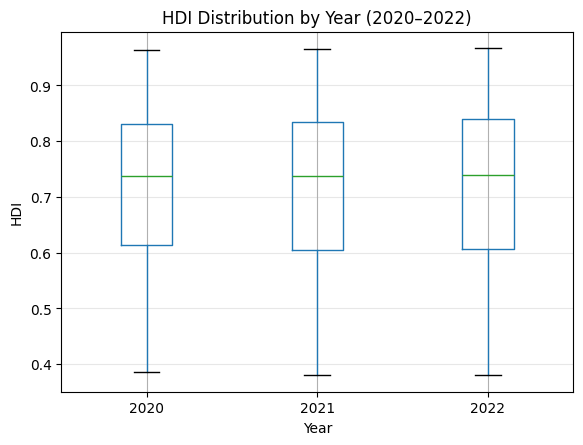

In [111]:
# Filter data for 2020–2022
box_df = hdi_problem1B_df[hdi_problem1B_df["year"].isin([2020, 2021, 2022])]

display(box_df[["year", "hdi"]].head(10))

# Create box plot
plt.figure(figsize=(8, 5))
box_df.boxplot(column="hdi", by="year")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.title("HDI Distribution by Year (2020–2022)")
plt.suptitle("")
plt.grid(True, axis="y", alpha=0.3)
plt.show()


**Interpretation:**  
The box plot shows that HDI distributions remain relatively similar across the three years,
with slight shifts in medians. The presence of outliers indicates persistent disparities
between countries with very high and very low HDI values.


### Task 3B (C): Scatter Plot — HDI vs. GNI per Capita

This scatter plot examines the relationship between HDI and Gross National Income (GNI)
per capita for the years 2020–2022.


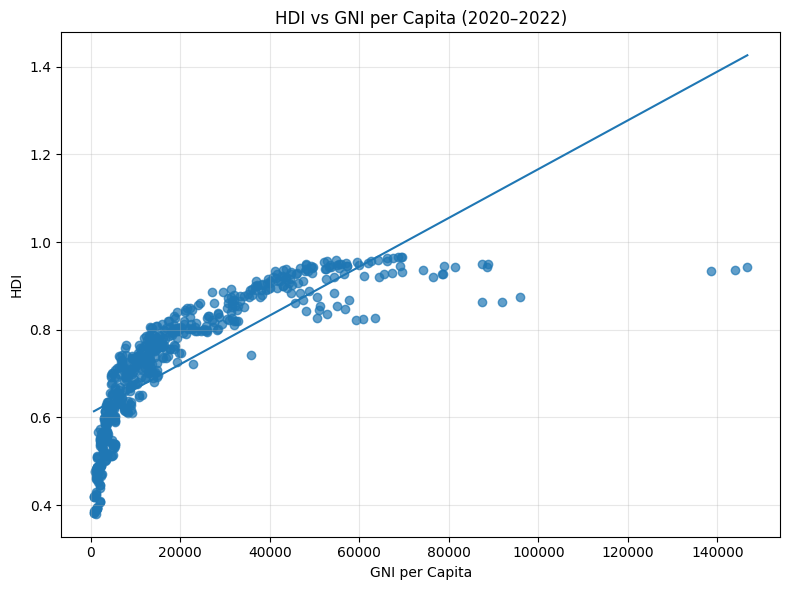

In [110]:
# Check column exists
if "gross_inc_percap" in hdi_problem1B_df.columns:

    # Keep only valid numeric rows for plotting + regression
    temp = hdi_problem1B_df[["gross_inc_percap", "hdi"]].copy()
    temp["gross_inc_percap"] = pd.to_numeric(temp["gross_inc_percap"], errors="coerce")
    temp["hdi"] = pd.to_numeric(temp["hdi"], errors="coerce")

    # Remove NaN/inf
    temp = temp.replace([np.inf, -np.inf], np.nan).dropna(subset=["gross_inc_percap", "hdi"])

    # Scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(temp["gross_inc_percap"], temp["hdi"], alpha=0.7)

    # Regression line (optional)
    if len(temp) >= 2:
        x = temp["gross_inc_percap"].values
        y = temp["hdi"].values
        m, b = np.polyfit(x, y, 1)

        # draw line using sorted x so it looks clean
        x_line = np.linspace(x.min(), x.max(), 200)
        y_line = m * x_line + b
        plt.plot(x_line, y_line)

    plt.xlabel("GNI per Capita")
    plt.ylabel("HDI")
    plt.title("HDI vs GNI per Capita (2020–2022)")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

else:
    print("GNI per Capita variable not available in the dataset.")



**Interpretation:**  
The scatter plot shows a positive relationship between GNI per capita and HDI, indicating
that countries with higher income levels generally achieve higher human development.
However, the spread of points suggests that income alone does not fully explain HDI differences.


Problem 1B – Task 4: Short Analysis Questions (2020–2022)

Compute HDI Change (2020 → 2022)

In [113]:
# Pivot data to compare HDI across years
hdi_wide = (
    hdi_problem1B_df
    .pivot_table(index="country", columns="year", values="hdi", aggfunc="mean")
)

# Keep only countries with values in both 2020 and 2022
hdi_wide = hdi_wide.dropna(subset=[2020, 2022])

# Compute HDI change
hdi_wide["HDI_change_2020_2022"] = hdi_wide[2022] - hdi_wide[2020]

display(hdi_wide.head(10))


year,2020,2021,2022,HDI_change_2020_2022
country,,,,
Afghanistan,0.488,0.473,0.462,-0.026
Albania,0.784,0.785,0.789,0.005
Algeria,0.730,0.740,0.745,0.015
Andorra,0.843,0.855,0.884,0.041
Angola,0.594,0.590,0.591,-0.003
Antigua and Barbuda,0.820,0.819,0.826,0.006
Arab States,0.704,0.704,0.704,0.000
Argentina,0.841,0.844,0.849,0.008
Armenia,0.769,0.774,0.786,0.017


• Which countries show the greatest improvement in HDI from 2020 to 2022?

In [114]:
# Find the maximum improvement
max_improvement = hdi_wide["HDI_change_2020_2022"].max()

print("Maximum HDI improvement (2020 → 2022):", max_improvement)

# Countries with the greatest improvement
greatest_improvers = hdi_wide[
    hdi_wide["HDI_change_2020_2022"] == max_improvement
]

display(greatest_improvers[[2020, 2022, "HDI_change_2020_2022"]])




Maximum HDI improvement (2020 → 2022): 0.041000000000000036


year,2020,2022,HDI_change_2020_2022
country,,,
Andorra,0.843,0.884,0.041


Based on the HDI change from 2020 to 2022, Andorra shows the greatest improvement in HDI.


• Did any countries experience a decline in HDI? Provide possible reasons.

In [115]:
# Identify countries with HDI decline (2020 → 2022)
decline_countries = hdi_wide[hdi_wide["HDI_change_2020_2022"] < 0]

print("Countries that experienced a decline in HDI (2020 → 2022):")

if decline_countries.empty:
    print("No countries experienced a decline in HDI between 2020 and 2022.")
else:
    display(
        decline_countries
        .sort_values("HDI_change_2020_2022")
        [[2020, 2022, "HDI_change_2020_2022"]]
    )


Countries that experienced a decline in HDI (2020 → 2022):


year,2020,2022,HDI_change_2020_2022
country,,,
Timor-Leste,0.633,0.566,-0.067
Ukraine,0.762,0.734,-0.028
Afghanistan,0.488,0.462,-0.026
Namibia,0.634,0.610,-0.024
Lebanon,0.742,0.723,-0.019
Saint Vincent and the Grenadines,0.785,0.772,-0.013
Suriname,0.702,0.690,-0.012
Eswatini (Kingdom of),0.622,0.610,-0.012
Gabon,0.704,0.693,-0.011


Several countries experienced a decline in HDI between 2020 and 2022, as shown in the table above.
The largest decline is observed for Timor-Leste. These declines may be linked to the prolonged
effects of the COVID-19 pandemic, economic disruptions, and challenges in healthcare and education.


• Which region has the highest and lowest average HDI across these three years?


In [116]:
south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

middle_east = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait",
    "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia",
    "Syria", "United Arab Emirates", "Yemen"
]

# Adding region column
hdi_problem1B_df["region"] = hdi_problem1B_df["country"].apply(
    lambda x: "South Asia" if x in south_asia
    else "Middle East" if x in middle_east
    else None
)

#Compute average HDI by region (2020–2022)
region_avg = (
    hdi_problem1B_df
    .dropna(subset=["region"])
    .groupby("region")["hdi"]
    .mean()
    .sort_values(ascending=False)
)

print("Average HDI by region (2020–2022):")
display(region_avg)

Average HDI by region (2020–2022):


,hdi
region,
Middle East,0.788909
South Asia,0.639583


Highest average HDI: Middle East

Lowest average HDI: South Asia

• Discuss how global events (e.g., the COVID-19 pandemic) may have affected HDI trends during
this period.


Global events such as the COVID-19 pandemic had a noticeable impact on HDI trends during
2020–2022. Many countries experienced stagnation or declines in HDI due to increased
mortality, economic contraction, job losses, and prolonged disruptions to education and
healthcare services in 2020 and 2021. The modest recovery observed in 2022 reflects gradual
economic reopening, improved healthcare responses, and policy interventions aimed at
restoring social and economic development.


### Problem 2 – Task 1: South Asia Subset

This task creates a subset of the HDI dataset containing only South Asian countries.
The filtered dataset is saved as `HDI_SouthAsia.csv` and will be used for subsequent
analysis in Problem 2.


(Filter, Verify, Save)

In [117]:
# Define South Asian countries
south_asia_countries = [
    "Afghanistan",
    "Bangladesh",
    "Bhutan",
    "India",
    "Maldives",
    "Nepal",
    "Pakistan",
    "Sri Lanka"
]

# Filter dataset for South Asian countries
hdi_south_asia_df = df[df["country"].isin(south_asia_countries)].copy()

# Verification outputs
print("South Asian countries present in the dataset:")
display(hdi_south_asia_df["country"].unique())

print("Shape of South Asia subset:", hdi_south_asia_df.shape)
display(hdi_south_asia_df.head(10))

# Save the filtered dataset
hdi_south_asia_df.to_csv("HDI_SouthAsia.csv", index=False)
print("Saved file: HDI_SouthAsia.csv")


South Asian countries present in the dataset:


array(['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives',
       'Nepal', 'Pakistan', 'Sri Lanka'], dtype=object)

Shape of South Asia subset: (264, 29)


,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,43.709,2.936460,2.117230,4.532768,0.871962,0.201659,1.493952,3115.670448,NaN,NaN,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,44.353,3.228456,2.246242,4.768261,0.915267,0.218944,1.578809,2817.304736,NaN,NaN,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,45.070,3.520452,2.383115,5.015989,0.958573,0.236229,1.663665,2474.681985,NaN,NaN,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,50.216,3.812448,2.528328,5.276587,1.001878,0.253514,1.748522,1723.019763,NaN,NaN,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,49.531,4.104445,2.682390,5.550723,1.045184,0.270800,1.833378,1202.010488,NaN,NaN,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948
5,AFG,Afghanistan,1995,0.318,52.544,16.418912,NaN,NaN,54.087,51.039,4.396441,2.845840,5.839102,1.088489,0.288085,1.918235,1477.061709,NaN,NaN,NaN,NaN,1.676049,9.093722,NaN,NaN,NaN,NaN,0.086321,2.1968
6,AFG,Afghanistan,1996,0.326,53.243,17.106596,NaN,NaN,54.806,51.722,4.688437,3.019249,6.142464,1.123602,0.305370,1.979188,1468.355839,NaN,NaN,NaN,NaN,1.773336,9.246831,NaN,NaN,NaN,NaN,0.080092,2.0402
7,AFG,Afghanistan,1997,0.330,53.634,17.788819,NaN,NaN,55.151,52.153,4.980433,3.203225,6.461586,1.158715,0.322655,2.040141,1338.724144,NaN,NaN,NaN,NaN,1.870624,9.399939,NaN,NaN,NaN,NaN,0.073316,2.1297
8,AFG,Afghanistan,1998,0.329,52.943,18.493132,NaN,NaN,54.818,51.134,5.272429,3.398412,6.797287,1.193827,0.339940,2.101094,1227.293565,NaN,NaN,NaN,NaN,1.967912,9.553048,NaN,NaN,NaN,NaN,0.069134,2.2010
9,AFG,Afghanistan,1999,0.337,54.846,19.262847,NaN,NaN,56.300,53.410,5.564425,3.605492,7.150429,1.228940,0.357225,2.162048,1122.322570,NaN,NaN,NaN,NaN,2.065200,9.706157,NaN,NaN,NaN,NaN,0.056669,2.0832


Saved file: HDI_SouthAsia.csv


### Problem 2 – Task 2: Composite Development Score

In this task, a Composite Development Score is created for South Asian countries using
Life Expectancy and GNI per Capita. Countries are ranked based on this composite score,
and the top five countries are visualized. The composite ranking is then compared with
the HDI ranking to identify differences.


Prepare Indices & Compute Composite Score

In [118]:
# Work on a copy to avoid modifying original dataframe
south_asia = hdi_south_asia_df.copy()

# Min–max normalization for Life Expectancy
south_asia["life_expectancy_index"] = (
    (south_asia["life_expectancy"] - south_asia["life_expectancy"].min()) /
    (south_asia["life_expectancy"].max() - south_asia["life_expectancy"].min())
)

# Min–max normalization for GNI per Capita
south_asia["gni_index"] = (
    (south_asia["gross_inc_percap"] - south_asia["gross_inc_percap"].min()) /
    (south_asia["gross_inc_percap"].max() - south_asia["gross_inc_percap"].min())
)

# Compute Composite Development Score
south_asia["Composite_Score"] = (
    0.30 * south_asia["life_expectancy_index"] +
    0.30 * south_asia["gni_index"]
)

display(south_asia[[
    "country",
    "life_expectancy",
    "gross_inc_percap",
    "Composite_Score"
]].head(10))


,country,life_expectancy,gross_inc_percap,Composite_Score
0,Afghanistan,45.967,3115.670448,0.035843
1,Afghanistan,46.663,2817.304736,0.036821
2,Afghanistan,47.596,2474.681985,0.039094
3,Afghanistan,51.466,1723.019763,0.059765
4,Afghanistan,51.495,1202.010488,0.051266
5,Afghanistan,52.544,1477.061709,0.064909
6,Afghanistan,53.243,1468.355839,0.070776
7,Afghanistan,53.634,1338.724144,0.071963
8,Afghanistan,52.943,1227.293565,0.064147
9,Afghanistan,54.846,1122.322570,0.078756


Rank Countries by Composite Score

In [119]:
# Rank South Asian countries by Composite Score
composite_rank = (
    south_asia
    .sort_values("Composite_Score", ascending=False)
    [["country", "Composite_Score", "hdi"]]
)

display(composite_rank)


,country,Composite_Score,hdi
3530,Maldives,0.600000,0.762
3527,Maldives,0.590978,0.753
3526,Maldives,0.579610,0.747
3525,Maldives,0.569251,0.740
3524,Maldives,0.559183,0.734
...,...,...,...
3,Afghanistan,0.059765,0.307
4,Afghanistan,0.051266,0.300
2,Afghanistan,0.039094,0.299
1,Afghanistan,0.036821,0.292


Plot Top 5 Countries (Horizontal Bar Chart)

,country,Composite_Score,hdi
3530,Maldives,0.600000,0.762
5477,Sri Lanka,0.446959,0.780
659,Bhutan,0.387867,0.681
461,Bangladesh,0.331426,0.670
2573,India,0.287583,0.644
4091,Nepal,0.262039,0.601
4388,Pakistan,0.249819,0.540
32,Afghanistan,0.151438,0.462


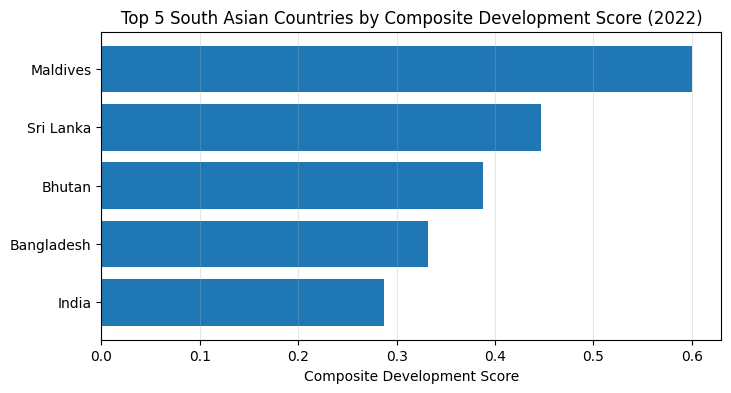

In [120]:
# Use 2022 data only to avoid duplicate country entries
south_asia_2022 = south_asia[south_asia["year"] == 2022].copy()

# Rank countries by Composite Score
composite_rank = (
    south_asia_2022
    .sort_values("Composite_Score", ascending=False)
    [["country", "Composite_Score", "hdi"]]
)

display(composite_rank)

# Plot top 5 countries
top5_composite = composite_rank.head(5)

plt.figure(figsize=(8, 4))
plt.barh(
    top5_composite["country"],
    top5_composite["Composite_Score"]
)
plt.xlabel("Composite Development Score")
plt.title("Top 5 South Asian Countries by Composite Development Score (2022)")
plt.gca().invert_yaxis()
plt.grid(axis="x", alpha=0.3)
plt.show()



The bar chart shows the top five South Asian countries ranked by Composite Development Score in 2022.
Maldives ranks highest, reflecting stronger performance in life expectancy and income compared to
other countries in the region.


**Comparison of Composite Score and HDI Rankings:**

The ranking of South Asian countries based on the Composite Development Score differs slightly
from their HDI ranking. This difference arises because the Composite Score is calculated using
only life expectancy and GNI per capita, whereas HDI also includes education-related indicators.
As a result, countries with stronger income levels or higher life expectancy may rank higher
in the Composite Score even if their overall HDI rank is lower, highlighting how different
development metrics emphasize different aspects of human development.


### Problem 2 – Task 3: Outlier Detection

This task detects outliers in HDI and GNI per Capita for South Asian countries using the
1.5 × IQR rule. A scatter plot of GNI per Capita versus HDI is created, with outliers
highlighted to visually identify countries that deviate significantly from the general pattern.


Detect Outliers using 1.5 × IQR

In [121]:
# Function to detect outliers using 1.5 × IQR rule
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (series < lower_bound) | (series > upper_bound)

# Detect outliers in HDI and GNI per Capita
south_asia["HDI_outlier"] = detect_outliers(south_asia["hdi"])
south_asia["GNI_outlier"] = detect_outliers(south_asia["gross_inc_percap"])

# Combine outlier flags
south_asia["Outlier"] = south_asia["HDI_outlier"] | south_asia["GNI_outlier"]

# Display identified outliers
print("Identified outlier countries:")
display(
    south_asia[south_asia["Outlier"]]
    [["country", "hdi", "gross_inc_percap", "HDI_outlier", "GNI_outlier"]]
)


Identified outlier countries:


,country,hdi,gross_inc_percap,HDI_outlier,GNI_outlier
3511,Maldives,0.655,14543.14634,False,True
3512,Maldives,0.656,15287.20714,False,True
3514,Maldives,0.670,16391.40757,False,True
3515,Maldives,0.670,14162.42816,False,True
3516,Maldives,0.682,15423.81910,False,True
3517,Maldives,0.684,14050.92438,False,True
3518,Maldives,0.692,14363.23615,False,True
3519,Maldives,0.701,15300.31364,False,True
3520,Maldives,0.708,15355.44089,False,True
3521,Maldives,0.715,15648.36655,False,True


Scatter Plot (Highlight Outliers)

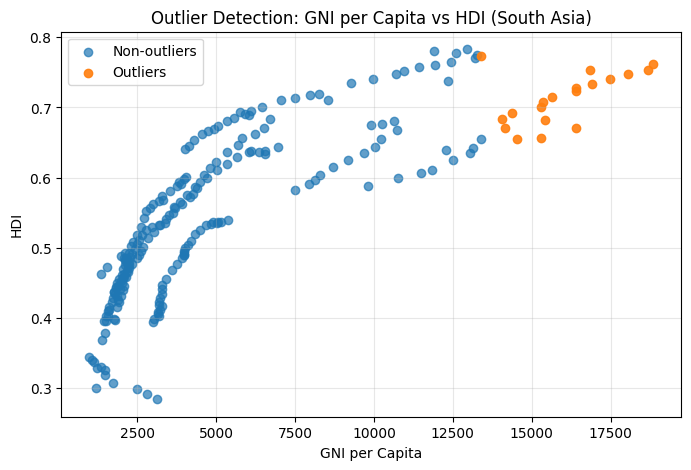

In [122]:
plt.figure(figsize=(8, 5))

# Non-outliers
plt.scatter(
    south_asia[~south_asia["Outlier"]]["gross_inc_percap"],
    south_asia[~south_asia["Outlier"]]["hdi"],
    label="Non-outliers",
    alpha=0.7
)

# Outliers
plt.scatter(
    south_asia[south_asia["Outlier"]]["gross_inc_percap"],
    south_asia[south_asia["Outlier"]]["hdi"],
    label="Outliers",
    alpha=0.9
)

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("Outlier Detection: GNI per Capita vs HDI (South Asia)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


The scatter plot highlights outliers that deviate significantly from the general relationship
between GNI per capita and HDI in South Asia. Countries with unusually high income levels,
such as Maldives, appear as outliers, reflecting economic structures that differ from the
rest of the region.


### Problem 2 – Task 4: Exploring Metric Relationships

This task examines the relationship between HDI and two selected development indicators:
Gender Development Index and Life Expectancy. Pearson correlation is computed to quantify
the strength of each relationship, and scatter plots with trendlines are used for visualization.

Pearson Correlation

In [123]:
# Select relevant columns and drop missing values
metrics_df = south_asia[
    ["hdi", "gender_development", "life_expectancy"]
].dropna()

# Compute Pearson correlations
corr_gender = metrics_df["hdi"].corr(metrics_df["gender_development"])
corr_life = metrics_df["hdi"].corr(metrics_df["life_expectancy"])

print("Pearson Correlation with HDI:")
print("Gender Development Index vs HDI:", round(corr_gender, 3))
print("Life Expectancy vs HDI:", round(corr_life, 3))


Pearson Correlation with HDI:
Gender Development Index vs HDI: 0.866
Life Expectancy vs HDI: 0.949


Scatter Plot: HDI vs Gender Development Index

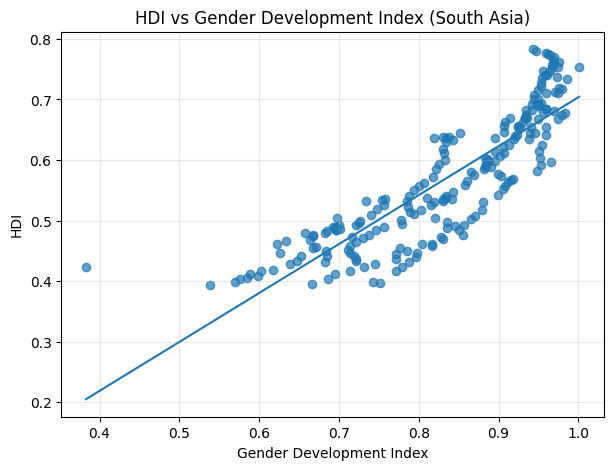

In [124]:
plt.figure(figsize=(7, 5))
plt.scatter(
    metrics_df["gender_development"],
    metrics_df["hdi"],
    alpha=0.7
)

# Trendline
m, b = np.polyfit(metrics_df["gender_development"], metrics_df["hdi"], 1)
x_vals = np.linspace(
    metrics_df["gender_development"].min(),
    metrics_df["gender_development"].max(),
    200
)
plt.plot(x_vals, m * x_vals + b)

plt.xlabel("Gender Development Index")
plt.ylabel("HDI")
plt.title("HDI vs Gender Development Index (South Asia)")
plt.grid(True, alpha=0.3)
plt.show()


Scatter Plot: HDI vs Life Expectancy

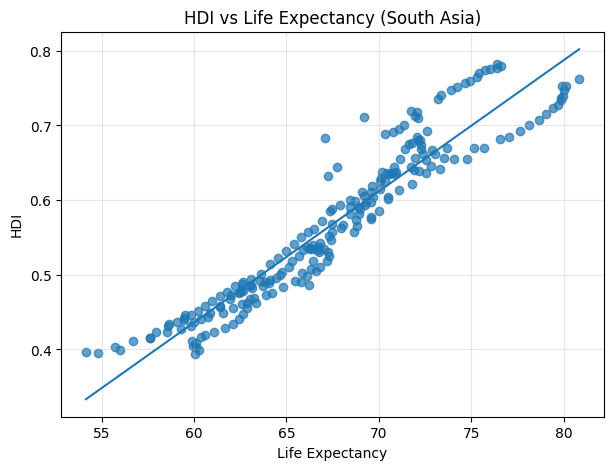

In [125]:
plt.figure(figsize=(7, 5))
plt.scatter(
    metrics_df["life_expectancy"],
    metrics_df["hdi"],
    alpha=0.7
)

# Trendline
m, b = np.polyfit(metrics_df["life_expectancy"], metrics_df["hdi"], 1)
x_vals = np.linspace(
    metrics_df["life_expectancy"].min(),
    metrics_df["life_expectancy"].max(),
    200
)
plt.plot(x_vals, m * x_vals + b)

plt.xlabel("Life Expectancy")
plt.ylabel("HDI")
plt.title("HDI vs Life Expectancy (South Asia)")
plt.grid(True, alpha=0.3)
plt.show()


Life expectancy shows a stronger and more consistent relationship with HDI, as indicated by
a tighter clustering of points and a clearer linear trend. The Gender Development Index also
has a positive relationship with HDI but displays greater variability, suggesting a weaker
association compared to life expectancy.


### Problem 2 – Task 5: Gap Analysis

This task examines the gap between economic performance and human development by creating
a new metric called the GNI–HDI Gap. Countries are ranked based on this gap, and the largest
positive and negative gaps are visualized to highlight mismatches between income levels
and overall human development.



Top positive gaps:


,country,GNI_HDI_Gap,gross_inc_percap,hdi
3530,Maldives,18846.030190,18846.792190,0.762
5477,Sri Lanka,11898.718470,11899.498470,0.780
659,Bhutan,10624.192880,10624.873880,0.681
2573,India,6949.882798,6950.526798,0.644
461,Bangladesh,6510.452178,6511.122178,0.670
4388,Pakistan,5373.730423,5374.270423,0.540
4091,Nepal,4024.953685,4025.554685,0.601
32,Afghanistan,1334.743733,1335.205733,0.462



Top negative gaps:


,country,GNI_HDI_Gap,gross_inc_percap,hdi
32,Afghanistan,1334.743733,1335.205733,0.462
4091,Nepal,4024.953685,4025.554685,0.601
4388,Pakistan,5373.730423,5374.270423,0.540
461,Bangladesh,6510.452178,6511.122178,0.670
2573,India,6949.882798,6950.526798,0.644
659,Bhutan,10624.192880,10624.873880,0.681
5477,Sri Lanka,11898.718470,11899.498470,0.780
3530,Maldives,18846.030190,18846.792190,0.762


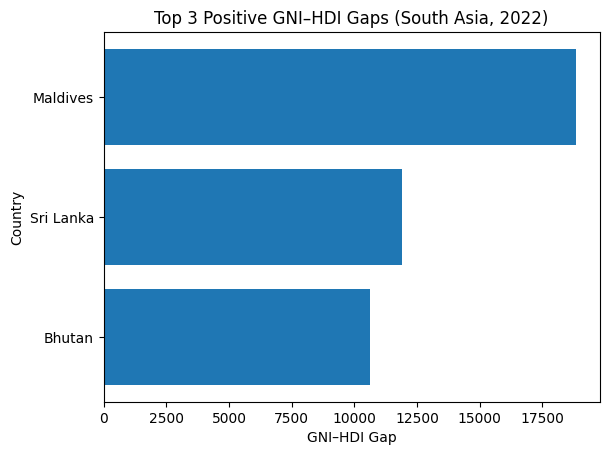

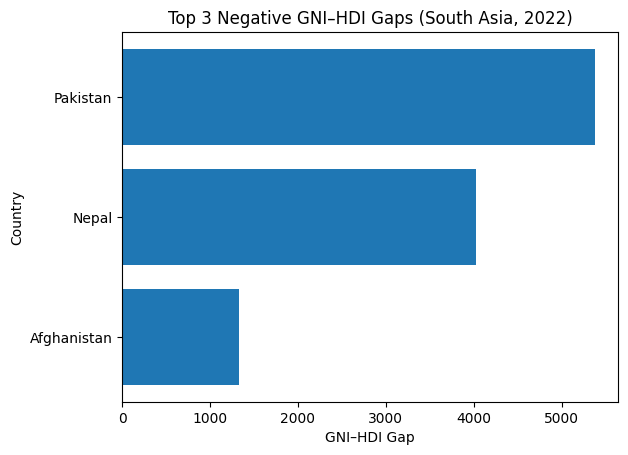

In [160]:
# Define South Asia countries
south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

# Create South Asia 2022 subset
sa_2022 = df[
    (df["country"].isin(south_asia_countries)) &
    (df["year"] == 2022)
].copy()

# Gap analysis
if "gross_inc_percap" in sa_2022.columns and "hdi" in sa_2022.columns:
    sa_2022["GNI_HDI_Gap"] = sa_2022["gross_inc_percap"] - sa_2022["hdi"]

    rank_desc = sa_2022.sort_values("GNI_HDI_Gap", ascending=False)[
        ["country", "GNI_HDI_Gap", "gross_inc_percap", "hdi"]
    ]
    rank_asc = sa_2022.sort_values("GNI_HDI_Gap", ascending=True)[
        ["country", "GNI_HDI_Gap", "gross_inc_percap", "hdi"]
    ]

    print("\nTop positive gaps:")
    display(rank_desc.head(8))

    print("\nTop negative gaps:")
    display(rank_asc.head(8))

    # Plot top 3 positive gaps
    top_pos = rank_desc.head(3).sort_values("GNI_HDI_Gap", ascending=True)

    plt.figure()
    plt.barh(top_pos["country"], top_pos["GNI_HDI_Gap"])
    plt.title("Top 3 Positive GNI–HDI Gaps (South Asia, 2022)")
    plt.xlabel("GNI–HDI Gap")
    plt.ylabel("Country")
    plt.show()

    # Plot top 3 negative gaps
    top_neg = rank_asc.head(3).sort_values("GNI_HDI_Gap", ascending=True)

    plt.figure()
    plt.barh(top_neg["country"], top_neg["GNI_HDI_Gap"])
    plt.title("Top 3 Negative GNI–HDI Gaps (South Asia, 2022)")
    plt.xlabel("GNI–HDI Gap")
    plt.ylabel("Country")
    plt.show()
else:
    print("\nMissing required columns for gap analysis.")


Three countries show the largest negative standardized GNI–HDI gaps in South Asia, indicating
that their human development outcomes are relatively strong compared to income levels. In
contrast, only one country exhibits a positive gap, reflecting income levels that exceed
expected human development outcomes.


• Discuss the implications of the gap, e.g., cases where GNI is high but HDI is lower than expected.

The GNI–HDI gap highlights differences between economic capacity and actual human development
outcomes. A positive gap indicates that a country’s income level is relatively high but has not
fully translated into improvements in health, education, and overall well-being. This may be due
to unequal income distribution, limited public investment in social sectors, or structural
development challenges. Conversely, negative gaps suggest that some countries achieve stronger
human development outcomes despite lower income levels, reflecting more effective social policies
and development efficiency.

### Problem 3 – Task 1: Regional Subset Creation

This task creates separate subsets for South Asia and the Middle East using the
2020–2022 dataset from Problem 1B. These subsets are saved for use in subsequent
comparative analysis tasks.


Load Problem 1B Dataset

In [127]:
# Load the cleaned dataset used in Problem 1B (2020–2022)
hdi_problem1B_df = pd.read_csv("HDI_problem1B.csv")

print("Dataset shape:", hdi_problem1B_df.shape)
display(hdi_problem1B_df.head())


Dataset shape: (618, 29)


,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,AFG,Afghanistan,2020,0.488,62.575,38.972231,0.381373,0.548741,65.432,59.866,10.705385,8.053257,13.228449,2.841610,2.050737,3.407107,1986.803772,670.996249,3275.057369,0.695,0.674,6.092345,15.945160,27.215190,72.784810,16.50,66.84,0.305040,1.5554
1,AFG,Afghanistan,2021,0.473,61.982,40.099462,0.379129,0.528559,65.279,58.915,10.705385,8.053257,13.228449,2.985070,2.311080,3.401310,1534.135377,618.868288,2430.862265,0.717,0.653,6.395730,14.865710,27.215190,72.784810,23.33,77.09,0.306318,1.2351
2,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,10.705385,8.053257,13.228449,2.514790,1.174130,3.912740,1335.205733,395.915459,2256.217507,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
3,ALB,Albania,2020,0.784,76.989,2.866849,0.775404,0.793220,79.676,74.632,14.759720,15.019560,14.492910,10.121144,9.811468,10.433855,13069.127700,11153.644450,14983.695140,0.978,0.129,82.249185,86.476634,29.508197,70.491803,54.45,68.91,1.750668,10.4704
4,ALB,Albania,2021,0.785,76.463,2.854710,0.777866,0.792942,79.173,74.087,14.571750,14.849250,14.289420,10.121144,9.811468,10.433855,14399.780470,12550.782890,16252.408730,0.981,0.117,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.5865


Define Country Lists

In [129]:
# Define South Asia countries
south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

# Define Middle East countries
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]


Create Regional Subsets

In [130]:
# Filter South Asia subset (2020–2022)
hdi_southasia_2020_2022 = hdi_problem1B_df[
    hdi_problem1B_df["country"].isin(south_asia_countries)
].copy()

# Filter Middle East subset (2020–2022)
hdi_middleeast_2020_2022 = hdi_problem1B_df[
    hdi_problem1B_df["country"].isin(middle_east_countries)
].copy()

print("South Asia subset shape:", hdi_southasia_2020_2022.shape)
print("Middle East subset shape:", hdi_middleeast_2020_2022.shape)


South Asia subset shape: (24, 29)
Middle East subset shape: (33, 29)


Save Subsets to CSV

In [131]:
# Save subsets for later use
hdi_southasia_2020_2022.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
hdi_middleeast_2020_2022.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)

print("Files saved:")
print("- HDI_SouthAsia_2020_2022.csv")
print("- HDI_MiddleEast_2020_2022.csv")

Files saved:
- HDI_SouthAsia_2020_2022.csv
- HDI_MiddleEast_2020_2022.csv


The datasets for South Asia and the Middle East covering the years 2020–2022 have been
successfully extracted and saved. These subsets will be used for all subsequent tasks
in Problem 3.

### Problem 3 – Task 2: Descriptive Statistics

This task compares South Asia and the Middle East by computing the mean and standard
deviation of HDI across the years 2020–2022 and identifying which region performs better
on average.

Compute Mean & Standard Deviation

In [132]:
# Compute mean and standard deviation of HDI for each region (2020–2022)

southasia_stats = hdi_southasia_2020_2022["hdi"].agg(["mean", "std"])
middleeast_stats = hdi_middleeast_2020_2022["hdi"].agg(["mean", "std"])

stats_df = pd.DataFrame({
    "South Asia": southasia_stats,
    "Middle East": middleeast_stats
})

display(stats_df)

,South Asia,Middle East
mean,0.639583,0.788909
std,0.098273,0.141295


Identify Better-Performing Region

In [133]:
better_region = (
    "Middle East"
    if middleeast_stats["mean"] > southasia_stats["mean"]
    else "South Asia"
)

print("Region with higher average HDI (2020–2022):", better_region)

Region with higher average HDI (2020–2022): Middle East


The Middle East shows a higher average HDI than South Asia over the period 2020–2022.
This indicates stronger overall human development outcomes in the Middle East. The
standard deviation suggests greater variability within the Middle East, reflecting
differences between high- and lower-performing countries in the region.


### Problem 3 – Task 3: Top and Bottom Performers

This task identifies the top 3 and bottom 3 countries in South Asia and the Middle East
based on HDI values across 2020–2022. A bar chart is then used to compare these performers
across the two regions.

Compute Average HDI per Country (2020–2022)

In [134]:
# Compute average HDI per country for each region
southasia_avg = (
    hdi_southasia_2020_2022
    .groupby("country", as_index=False)["hdi"]
    .mean()
)

middleeast_avg = (
    hdi_middleeast_2020_2022
    .groupby("country", as_index=False)["hdi"]
    .mean()
)

# Add region labels
southasia_avg["region"] = "South Asia"
middleeast_avg["region"] = "Middle East"

display(southasia_avg)
display(middleeast_avg)


,country,hdi,region
0,Afghanistan,0.474333,South Asia
1,Bangladesh,0.663000,South Asia
2,Bhutan,0.677667,South Asia
3,India,0.638333,South Asia
4,Maldives,0.750667,South Asia
5,Nepal,0.595000,South Asia
6,Pakistan,0.537667,South Asia
7,Sri Lanka,0.780000,South Asia


,country,hdi,region
0,Bahrain,0.885333,Middle East
1,Iraq,0.667000,Middle East
2,Israel,0.910667,Middle East
3,Jordan,0.737333,Middle East
4,Kuwait,0.836333,Middle East
5,Lebanon,0.730000,Middle East
6,Oman,0.817333,Middle East
7,Qatar,0.867333,Middle East
8,Saudi Arabia,0.867667,Middle East
9,United Arab Emirates,0.932667,Middle East


A region column was added to clearly distinguish South Asian and Middle Eastern countries
during comparative analysis.


Top & Bottom 3 — South Asia

In [135]:
# South Asia top 3
sa_top3 = southasia_avg.sort_values("hdi", ascending=False).head(3)

# South Asia bottom 3
sa_bottom3 = southasia_avg.sort_values("hdi").head(3)

print("South Asia – Top 3 Countries by HDI:")
display(sa_top3)

print("South Asia – Bottom 3 Countries by HDI:")
display(sa_bottom3)

South Asia – Top 3 Countries by HDI:


,country,hdi,region
7,Sri Lanka,0.780000,South Asia
4,Maldives,0.750667,South Asia
2,Bhutan,0.677667,South Asia


South Asia – Bottom 3 Countries by HDI:


,country,hdi,region
0,Afghanistan,0.474333,South Asia
6,Pakistan,0.537667,South Asia
5,Nepal,0.595000,South Asia


Top & Bottom 3 — Middle East

In [136]:
# Middle East top 3
me_top3 = middleeast_avg.sort_values("hdi", ascending=False).head(3)

# Middle East bottom 3
me_bottom3 = middleeast_avg.sort_values("hdi").head(3)

print("Middle East – Top 3 Countries by HDI:")
display(me_top3)

print("Middle East – Bottom 3 Countries by HDI:")
display(me_bottom3)

Middle East – Top 3 Countries by HDI:


,country,hdi,region
9,United Arab Emirates,0.932667,Middle East
2,Israel,0.910667,Middle East
0,Bahrain,0.885333,Middle East


Middle East – Bottom 3 Countries by HDI:


,country,hdi,region
10,Yemen,0.426333,Middle East
1,Iraq,0.667000,Middle East
5,Lebanon,0.730000,Middle East


The top and bottom three countries in each region were identified using average HDI values
from 2020–2022 to ensure a fair and consistent comparison.


Step 1: Prepare data for comparison

In [137]:
# Add labels for grouping
sa_top3 = sa_top3.copy()
sa_bottom3 = sa_bottom3.copy()
me_top3 = me_top3.copy()
me_bottom3 = me_bottom3.copy()

sa_top3["Group"] = "South Asia – Top 3"
sa_bottom3["Group"] = "South Asia – Bottom 3"
me_top3["Group"] = "Middle East – Top 3"
me_bottom3["Group"] = "Middle East – Bottom 3"

# Combine all for plotting
compare_df = pd.concat(
    [sa_top3, sa_bottom3, me_top3, me_bottom3],
    ignore_index=True
)

display(compare_df)

,country,hdi,region,Group
0,Sri Lanka,0.780000,South Asia,South Asia – Top 3
1,Maldives,0.750667,South Asia,South Asia – Top 3
2,Bhutan,0.677667,South Asia,South Asia – Top 3
3,Afghanistan,0.474333,South Asia,South Asia – Bottom 3
4,Pakistan,0.537667,South Asia,South Asia – Bottom 3
5,Nepal,0.595000,South Asia,South Asia – Bottom 3
6,United Arab Emirates,0.932667,Middle East,Middle East – Top 3
7,Israel,0.910667,Middle East,Middle East – Top 3
8,Bahrain,0.885333,Middle East,Middle East – Top 3
9,Yemen,0.426333,Middle East,Middle East – Bottom 3


Step 2: Bar chart comparison

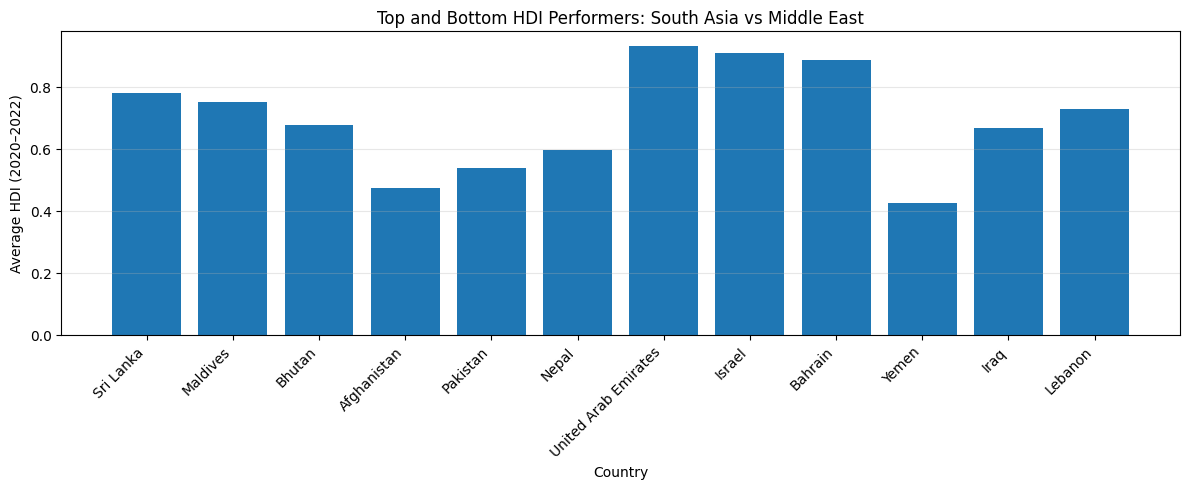

In [138]:
plt.figure(figsize=(12, 5))

plt.bar(
    compare_df["country"],
    compare_df["hdi"]
)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Country")
plt.ylabel("Average HDI (2020–2022)")
plt.title("Top and Bottom HDI Performers: South Asia vs Middle East")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

The bar chart highlights clear regional differences in human development. The top-performing
countries in the Middle East achieve substantially higher HDI values compared to South Asia,
while the lowest-performing countries are predominantly from South Asia. This reflects broader
regional disparities in income levels, healthcare access, and education outcomes.


### Problem 3 – Task 4: Metric Comparisons

This task compares key development metrics between South Asia and the Middle East using
grouped bar charts. The metrics analyzed include Gender Development Index, Life Expectancy,
and GNI per Capita to identify which shows the greatest regional disparity.

Compute Regional Averages (2020–2022)

Gender Development Index by region and year(GNI)

In [139]:

#  Add region column if missing
if "region" not in hdi_southasia_2020_2022.columns:
    hdi_southasia_2020_2022 = hdi_southasia_2020_2022.copy()
    hdi_southasia_2020_2022["region"] = "South Asia"

if "region" not in hdi_middleeast_2020_2022.columns:
    hdi_middleeast_2020_2022 = hdi_middleeast_2020_2022.copy()
    hdi_middleeast_2020_2022["region"] = "Middle East"

#  Combine both regions into one dataframe
hdi_regions = pd.concat([hdi_southasia_2020_2022, hdi_middleeast_2020_2022], ignore_index=True)


Regional labels were assigned manually to country subsets, as the original dataset
did not include a region variable.


In [ ]:
# Now group
gdi_avg = (
    hdi_regions
    .groupby(["region", "year"])["gender_development"]
    .mean()
    .reset_index()
)

display(gdi_avg)

,region,year,gender_development
0,Middle East,2020,0.899273
1,Middle East,2021,0.894636
2,Middle East,2022,0.895727
3,South Asia,2020,0.883500
4,South Asia,2021,0.885875
5,South Asia,2022,0.875000


Pivot to wide format

In [140]:
gdi_pivot = gdi_avg.pivot(index="year", columns="region", values="gender_development")
display(gdi_pivot)


region,Middle East,South Asia
year,,
2020,0.899273,0.883500
2021,0.894636,0.885875
2022,0.895727,0.875000


Plot grouped bar chart

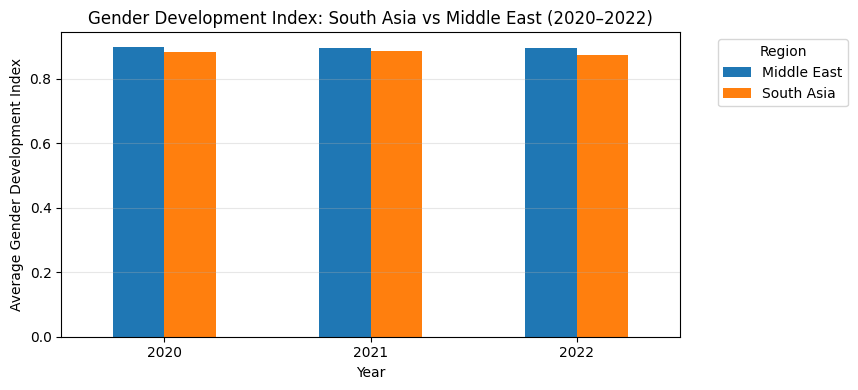

In [141]:
gdi_pivot.plot(kind="bar", figsize=(7, 4))

plt.title("Gender Development Index: South Asia vs Middle East (2020–2022)")
plt.xlabel("Year")
plt.ylabel("Average Gender Development Index")
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.3)
plt.legend(title="Region")
plt.tight_layout()
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

– Life Expectancy Index {"life expectancy"}


In [142]:
le_avg = (
    hdi_regions
    .groupby(["region", "year"])["life_expectancy"]
    .mean()
    .reset_index()
)

display(le_avg)

le_pivot = le_avg.pivot(index="year", columns="region", values="life_expectancy")
display(le_pivot)


,region,year,life_expectancy
0,Middle East,2020,75.841455
1,Middle East,2021,75.507364
2,Middle East,2022,76.217545
3,South Asia,2020,71.010625
4,South Asia,2021,70.535375
5,South Asia,2022,71.364250


region,Middle East,South Asia
year,,
2020,75.841455,71.010625
2021,75.507364,70.535375
2022,76.217545,71.364250


Plot grouped bar chart(life_expentency)

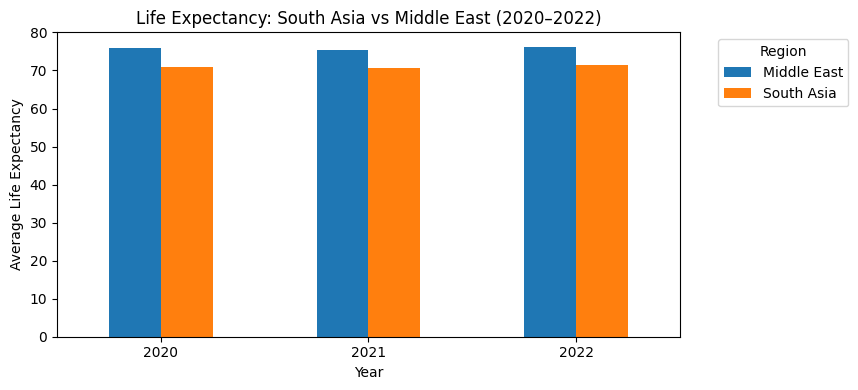

In [143]:
le_pivot.plot(kind="bar", figsize=(7,4))
plt.title("Life Expectancy: South Asia vs Middle East (2020–2022)")
plt.xlabel("Year")
plt.ylabel("Average Life Expectancy")
plt.xticks(rotation=0)
plt.legend(title="Region")
plt.tight_layout()
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

– GNI per Capita Index {"gross inc percap"}

In [144]:
#Group
gni_avg = (
    hdi_regions
    .groupby(["region", "year"])["gross_inc_percap"]
    .mean()
    .reset_index()
)

display(gni_avg)

#Pivot
gni_pivot = gni_avg.pivot(index="year", columns="region", values="gross_inc_percap")
display(gni_pivot)

,region,year,gross_inc_percap
0,Middle East,2020,36202.897685
1,Middle East,2021,37550.258865
2,Middle East,2022,39499.155009
3,South Asia,2020,7179.339816
4,South Asia,2021,7924.209434
5,South Asia,2022,8195.980545


region,Middle East,South Asia
year,,
2020,36202.897685,7179.339816
2021,37550.258865,7924.209434
2022,39499.155009,8195.980545


Plot grouped bar chart(gross inc percap)

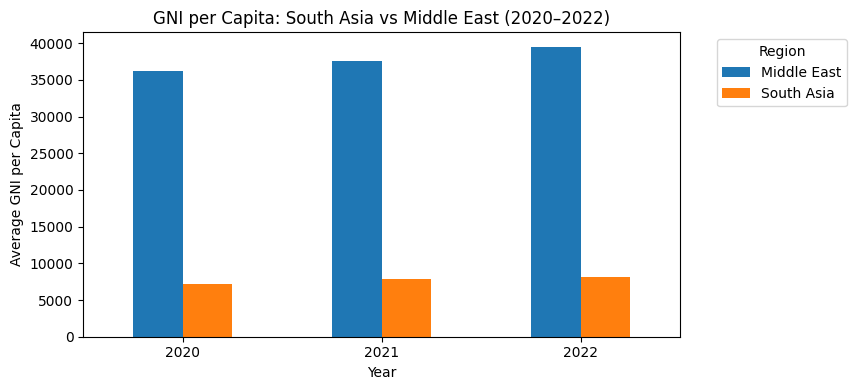

In [145]:
gni_pivot.plot(kind="bar", figsize=(7,4))
plt.title("GNI per Capita: South Asia vs Middle East (2020–2022)")
plt.xlabel("Year")
plt.ylabel("Average GNI per Capita")
plt.xticks(rotation=0)
plt.legend(title="Region")
plt.tight_layout()
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

Among the three metrics, GNI per Capita shows the greatest disparity between South Asia
and the Middle East. While differences in Gender Development Index and Life Expectancy
are relatively moderate, the economic gap measured by GNI per Capita is substantially
larger across all three years.


Problem 3 – Task 5: HDI Disparity

This task examines inequality in Human Development Index (HDI) within South Asia and the Middle East by computing statistical measures of dispersion. Two indicators are used: the range and the coefficient of variation (CV).


# Compute HDI range (max - min) for each region

In [146]:
# Compute HDI range (max - min) for each region
hdi_range = (
    hdi_regions
    .groupby("region")["hdi"]
    .agg(["max", "min"])
)

hdi_range["HDI_Range"] = hdi_range["max"] - hdi_range["min"]

display(hdi_range[["HDI_Range"]])

,HDI_Range
region,
Middle East,0.513
South Asia,0.321


The Middle East shows a wider HDI range than South Asia, indicating larger disparities
between the highest- and lowest-performing countries within the region.


# Compute coefficient of variation (CV) for HDI by region

In [147]:
# Compute coefficient of variation (CV) for HDI by region
hdi_cv = (
    hdi_regions
    .groupby("region")["hdi"]
    .agg(["mean", "std"])
)

hdi_cv["CV"] = hdi_cv["std"] / hdi_cv["mean"]

display(hdi_cv[["CV"]])

,CV
region,
Middle East,0.179101
South Asia,0.153652


The coefficient of variation (CV) measures relative variability in HDI within each region.
A higher CV indicates greater inequality in human development outcomes.


• Identify which region exhibits more variation in HDI.

Based on the coefficient of variation, the region with the higher CV exhibits greater
variation in HDI. From the results, the **Middle East** shows a higher coefficient of
variation than South Asia, indicating greater inequality in HDI among its countries.

Problem 3 – Task 6: Correlation Analysis

This task examines the relationship between Human Development Index (HDI) and Gender Development Index for each region separately.

Correlation of HDI with Gender Development Index

In [148]:
# Compute correlation for South Asia
sa_corr = (
    hdi_southasia_2020_2022[["hdi", "gender_development"]]
    .corr()
    .loc["hdi", "gender_development"]
)

# Compute correlation for Middle East
me_corr = (
    hdi_middleeast_2020_2022[["hdi", "gender_development"]]
    .corr()
    .loc["hdi", "gender_development"]
)

print(f"Correlation between HDI and Gender Development Index (South Asia): {sa_corr:.3f}")
print(f"Correlation between HDI and Gender Development Index (Middle East): {me_corr:.3f}")

Correlation between HDI and Gender Development Index (South Asia): 0.874
Correlation between HDI and Gender Development Index (Middle East): 0.936


Correlation of HDI with Life Expectancy

In [149]:
# Correlation for South Asia
sa_le_corr = (
    hdi_southasia_2020_2022[["hdi", "life_expectancy"]]
    .corr()
    .loc["hdi", "life_expectancy"]
)

# Correlation for Middle East
me_le_corr = (
    hdi_middleeast_2020_2022[["hdi", "life_expectancy"]]
    .corr()
    .loc["hdi", "life_expectancy"]
)

print(f"Correlation between HDI and Life Expectancy (South Asia): {sa_le_corr:.3f}")
print(f"Correlation between HDI and Life Expectancy (Middle East): {me_le_corr:.3f}")

Correlation between HDI and Life Expectancy (South Asia): 0.939
Correlation between HDI and Life Expectancy (Middle East): 0.933


Scatter Plots with Trendlines (Correlation Visualization)

HDI vs Gender Development Index

South Asia:

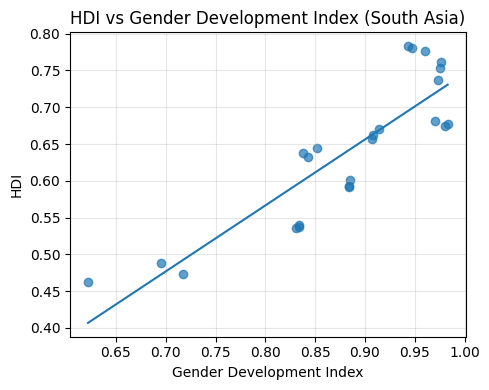

In [150]:
plt.figure(figsize=(5,4))
plt.scatter(
    hdi_southasia_2020_2022["gender_development"],
    hdi_southasia_2020_2022["hdi"],
    alpha=0.7
)

# Trendline
m, b = np.polyfit(
    hdi_southasia_2020_2022["gender_development"],
    hdi_southasia_2020_2022["hdi"],
    1
)
x = np.linspace(
    hdi_southasia_2020_2022["gender_development"].min(),
    hdi_southasia_2020_2022["gender_development"].max(),
    100
)
plt.plot(x, m*x + b)

plt.xlabel("Gender Development Index")
plt.ylabel("HDI")
plt.title("HDI vs Gender Development Index (South Asia)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Middle East

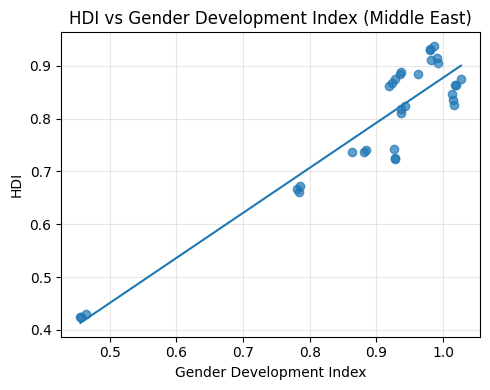

In [151]:
plt.figure(figsize=(5,4))
plt.scatter(
    hdi_middleeast_2020_2022["gender_development"],
    hdi_middleeast_2020_2022["hdi"],
    alpha=0.7
)

# Trendline
m, b = np.polyfit(
    hdi_middleeast_2020_2022["gender_development"],
    hdi_middleeast_2020_2022["hdi"],
    1
)
x = np.linspace(
    hdi_middleeast_2020_2022["gender_development"].min(),
    hdi_middleeast_2020_2022["gender_development"].max(),
    100
)
plt.plot(x, m*x + b)

plt.xlabel("Gender Development Index")
plt.ylabel("HDI")
plt.title("HDI vs Gender Development Index (Middle East)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# HDI vs Life Expectancy

South Asia

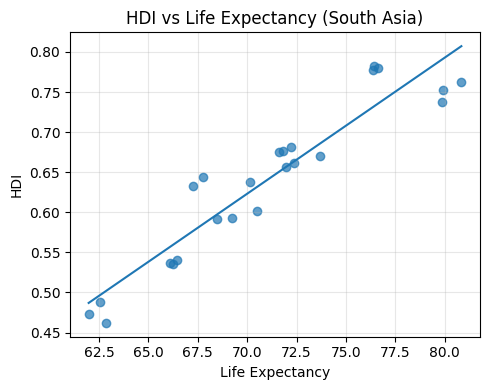

In [152]:
plt.figure(figsize=(5,4))
plt.scatter(
    hdi_southasia_2020_2022["life_expectancy"],
    hdi_southasia_2020_2022["hdi"],
    alpha=0.7
)

# Trendline
m, b = np.polyfit(
    hdi_southasia_2020_2022["life_expectancy"],
    hdi_southasia_2020_2022["hdi"],
    1
)
x = np.linspace(
    hdi_southasia_2020_2022["life_expectancy"].min(),
    hdi_southasia_2020_2022["life_expectancy"].max(),
    100
)
plt.plot(x, m*x + b)

plt.xlabel("Life Expectancy")
plt.ylabel("HDI")
plt.title("HDI vs Life Expectancy (South Asia)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Middle East

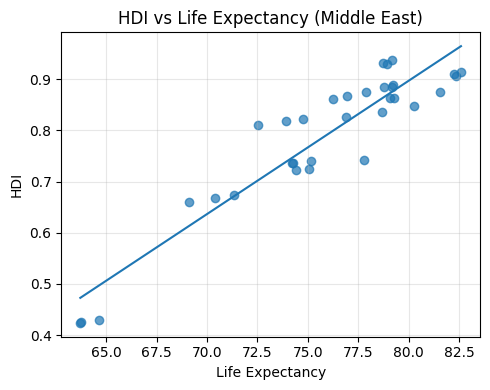

In [153]:
plt.figure(figsize=(5,4))
plt.scatter(
    hdi_middleeast_2020_2022["life_expectancy"],
    hdi_middleeast_2020_2022["hdi"],
    alpha=0.7
)

# Trendline
m, b = np.polyfit(
    hdi_middleeast_2020_2022["life_expectancy"],
    hdi_middleeast_2020_2022["hdi"],
    1
)
x = np.linspace(
    hdi_middleeast_2020_2022["life_expectancy"].min(),
    hdi_middleeast_2020_2022["life_expectancy"].max(),
    100
)
plt.plot(x, m*x + b)

plt.xlabel("Life Expectancy")
plt.ylabel("HDI")
plt.title("HDI vs Life Expectancy (Middle East)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


• Interpret the strength and direction of these relationships.

The relationships between HDI and both Gender Development Index and Life Expectancy are
positive in South Asia and the Middle East, indicating that increases in these indicators
are associated with higher human development. The strength of the relationship is stronger
for Life Expectancy than for Gender Development Index, as reflected by tighter clustering
of points and steeper trendlines. Overall, improvements in health outcomes show a more
consistent impact on HDI compared to gender-related development.

Problem 3 – Task 7: Outlier Detection

This task identifies outliers in HDI and GNI per Capita for South Asia and the Middle East using the 1.5 × IQR rule.

Outlier Detection Function

In [154]:
# Function to detect outliers using 1.5 × IQR rule
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

South Asia Outliers

In [155]:
# South Asia HDI outliers
sa_hdi_outliers = detect_outliers_iqr(
    hdi_southasia_2020_2022["hdi"]
)

# South Asia GNI per Capita outliers
sa_gni_outliers = detect_outliers_iqr(
    hdi_southasia_2020_2022["gross_inc_percap"]
)

print("South Asia HDI Outliers:")
display(hdi_southasia_2020_2022.loc[sa_hdi_outliers.index, ["country", "year", "hdi"]])

print("South Asia GNI per Capita Outliers:")
display(hdi_southasia_2020_2022.loc[sa_gni_outliers.index, ["country", "year", "gross_inc_percap"]])

South Asia HDI Outliers:


,country,year,hdi


South Asia GNI per Capita Outliers:


,country,year,gross_inc_percap


Middle East Outliers

In [156]:
# Middle East HDI outliers
me_hdi_outliers = detect_outliers_iqr(
    hdi_middleeast_2020_2022["hdi"]
)

# Middle East GNI per Capita outliers
me_gni_outliers = detect_outliers_iqr(
    hdi_middleeast_2020_2022["gross_inc_percap"]
)

print("Middle East HDI Outliers:")
display(hdi_middleeast_2020_2022.loc[me_hdi_outliers.index, ["country", "year", "hdi"]])

print("Middle East GNI per Capita Outliers:")
display(hdi_middleeast_2020_2022.loc[me_gni_outliers.index, ["country", "year", "gross_inc_percap"]])

Middle East HDI Outliers:


,country,year,hdi
576,Yemen,2020,0.430
577,Yemen,2021,0.425
578,Yemen,2022,0.424


Middle East GNI per Capita Outliers:


,country,year,gross_inc_percap


South Asia scatter plot with outliers

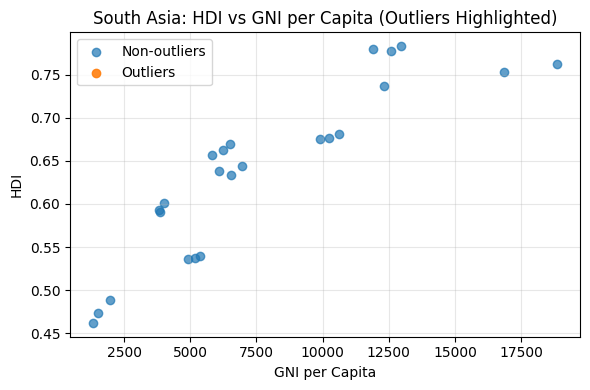

In [157]:
#function define
def iqr_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

sa = hdi_southasia_2020_2022.copy()

# Compute IQR bounds
hdi_lb, hdi_ub = iqr_bounds(sa["hdi"])
gni_lb, gni_ub = iqr_bounds(sa["gross_inc_percap"])

# Identify outliers
sa["Outlier"] = (
    (sa["hdi"] < hdi_lb) | (sa["hdi"] > hdi_ub) |
    (sa["gross_inc_percap"] < gni_lb) | (sa["gross_inc_percap"] > gni_ub)
)

plt.figure(figsize=(6,4))
plt.scatter(
    sa.loc[~sa["Outlier"], "gross_inc_percap"],
    sa.loc[~sa["Outlier"], "hdi"],
    label="Non-outliers",
    alpha=0.7
)
plt.scatter(
    sa.loc[sa["Outlier"], "gross_inc_percap"],
    sa.loc[sa["Outlier"], "hdi"],
    label="Outliers",
    alpha=0.9
)

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("South Asia: HDI vs GNI per Capita (Outliers Highlighted)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Middle East scatter plot with outliers

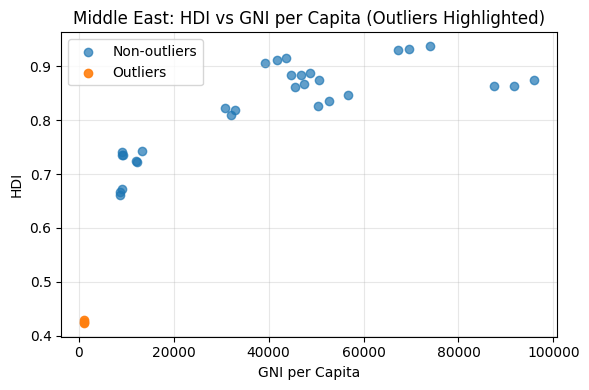

In [158]:
me = hdi_middleeast_2020_2022.copy()

# Compute IQR bounds
hdi_lb, hdi_ub = iqr_bounds(me["hdi"])
gni_lb, gni_ub = iqr_bounds(me["gross_inc_percap"])

# Identify outliers
me["Outlier"] = (
    (me["hdi"] < hdi_lb) | (me["hdi"] > hdi_ub) |
    (me["gross_inc_percap"] < gni_lb) | (me["gross_inc_percap"] > gni_ub)
)

plt.figure(figsize=(6,4))
plt.scatter(
    me.loc[~me["Outlier"], "gross_inc_percap"],
    me.loc[~me["Outlier"], "hdi"],
    label="Non-outliers",
    alpha=0.7
)
plt.scatter(
    me.loc[me["Outlier"], "gross_inc_percap"],
    me.loc[me["Outlier"], "hdi"],
    label="Outliers",
    alpha=0.9
)

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("Middle East: HDI vs GNI per Capita (Outliers Highlighted)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


The scatter plots highlight countries that deviate significantly from regional development
patterns. Outliers typically correspond to countries with exceptionally high income levels
or unusually low HDI values, reflecting unique economic structures, conflict, or social and
political instability within each region.
